## import library

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
def viz(df, types):
    num = df
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
    g = g.map(types, "value")
    plt.show()
    return g


import warnings
warnings.filterwarnings('ignore')

In [47]:
# outliers report
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

## load dataset

In [48]:
# create path data
data_path = '../data/'

In [49]:
# header dari kolom
kolom = ['Pregnancies','Glucose', 'BloodPressure',
'SkinThickness', 'Insulin', 'BMI', 
'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [50]:
# load dataset
df_pima = pd.read_csv(data_path + "pima-indians-diabetes.csv", names=kolom)
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [51]:
# cek dimensi data
print(f"Number of Data Samples : {df_pima.shape[0]} \nNumber of Features : {df_pima.shape[1]}")

Number of Data Samples : 768 
Number of Features : 9


In [52]:
# info dari data
df_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Karena jumlah baris 768, sehingga bisa disimpulkan bahwa tidak ada data yang mempunyai missing value

In [53]:
# cek statisktik deskriptif data
df_pima.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


namun jika dilihat disini nilai min ada yang 0. Jika untuk kolom Pregnancies bisa ditoleransi 
mungkin si pasien memang tidak pernah hamil dan untuk kolom Outcome juga sama karena 0 melambang tidak diabet.
Namun untuk kolom lainnya perlu diolah lebih lanjut, karena bisa saja 0 itu melambang data yang tidak ada

In [54]:
print('Number of 0s in each column\n')
for col in df_pima:
    print(f"{col} : {(df_pima[col]==0).sum()}")

Number of 0s in each column

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


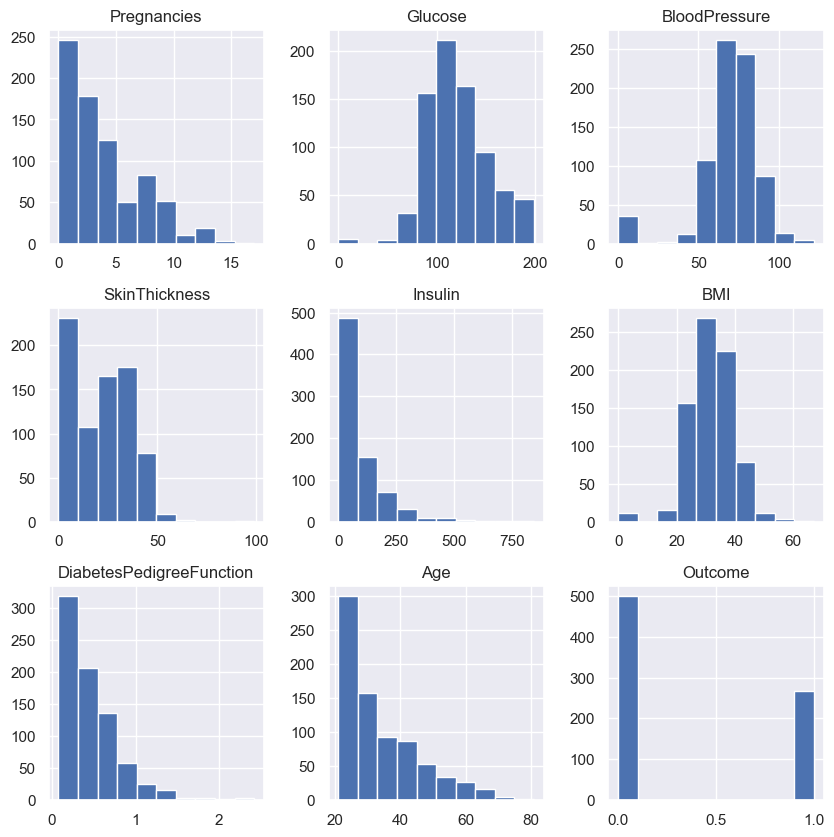

In [55]:
# persebaran data
df_pima.hist(figsize = (10,10))
plt.show()

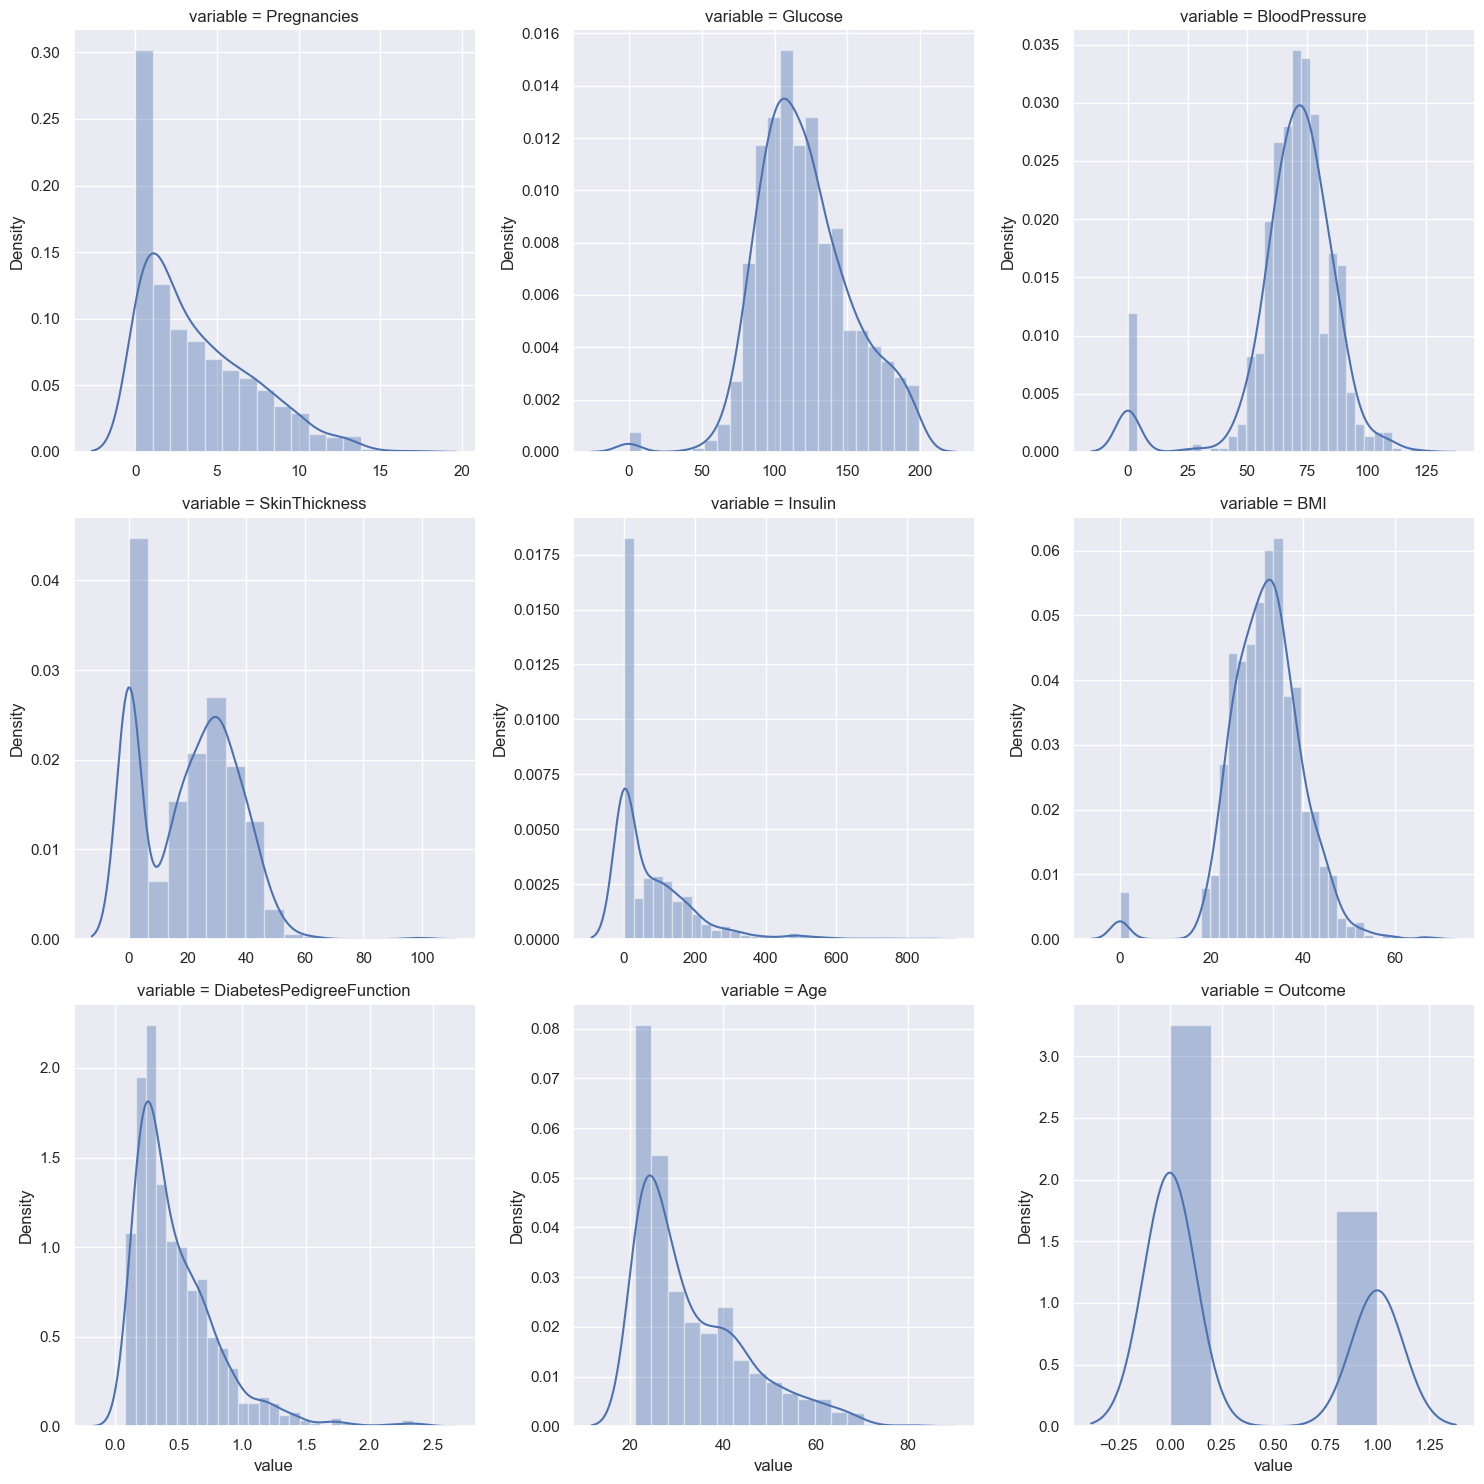

In [56]:
# Inisialisasi seaborn
sns.set()

# skewness biar jelas
viz(df_pima, sns.distplot)

Komen terhadap nilai 0 :

1. Pregnancies : 250 data, tapi ini mungkin terjadi bahwa di pasien tidak pernah hamil. Terlebih lagi usia pasien tersebar dari 20 - 80 an
2. Glucose : data tidak terlalu banyak (distribusi normal)
3. Blood Pressure : data tidak terlalu banyak (distribusi normal)
4. SkinThickness : Lebih dari 200, ini bisa memungkin bahwa 0 ini cuma pengisi (skewness +)
5. Insulin : Hampir mencapai 500, ini bisa memungkin bahwa 0 ini cuma pengisi (skewness +)
6. BMI : data tidak terlalu banyak (distribusi normal)

In [57]:
# buat dataframe lain (copyan dari asli untuk olah 0)
df_copy = df_pima.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

#Checking
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [58]:
# LotFrontage with median , GarageYrBlt mean , and MasVnrArea with median
df_copy[['SkinThickness','Insulin']] = df_copy[['SkinThickness','Insulin']].fillna(df_copy[['SkinThickness','Insulin']].median())
df_copy[['Glucose', 'BloodPressure', 'BMI']] = df_copy[['Glucose', 'BloodPressure', 'BMI']].fillna(df_copy[['Glucose', 'BloodPressure', 'BMI']].mean())

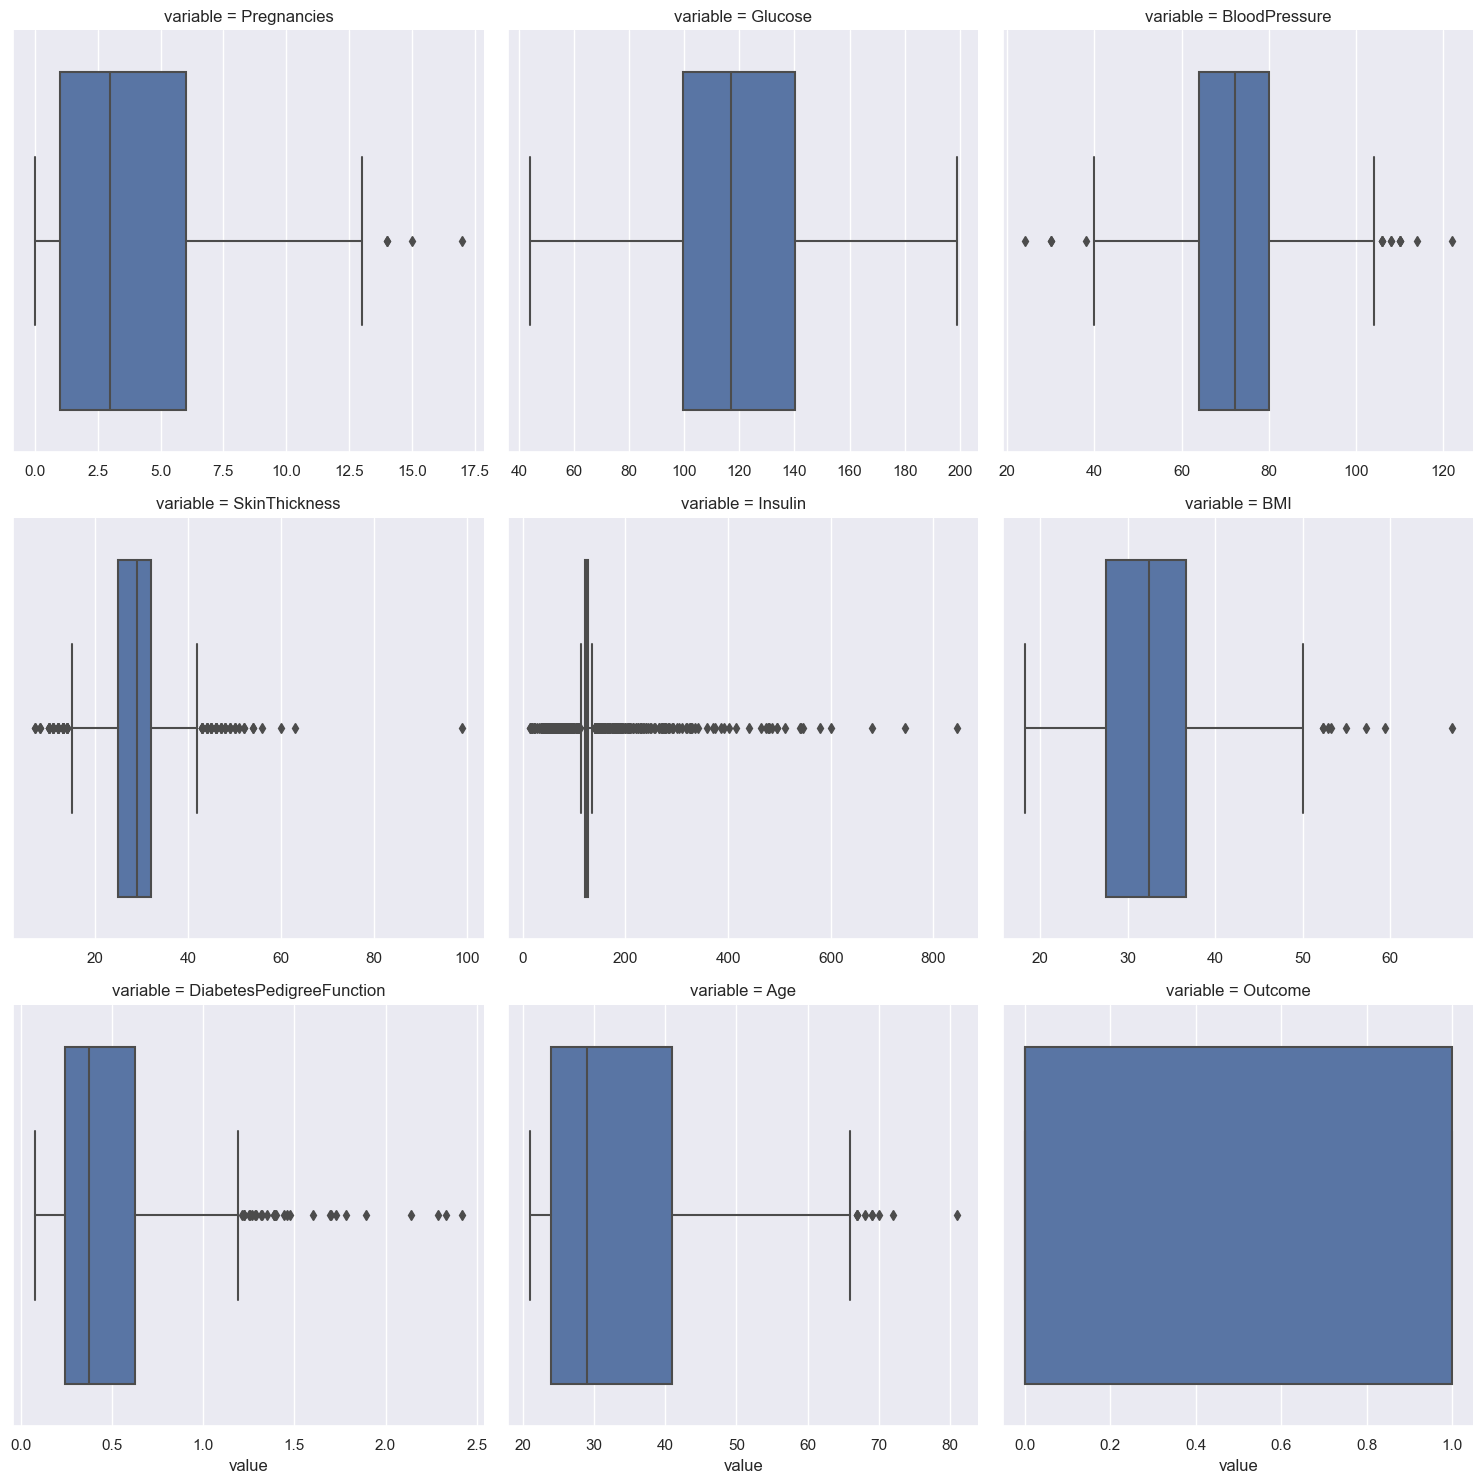

In [59]:
viz(df_copy, sns.boxplot)

Kolom Pregnancies, Glucose, BloodPressure, BMI, and Age bisa ditoleransi karena sedikit outlier.

Kolom DiabetesPedigreeFunction, SkinThickness, Insulin punya outlier. Untuk insulin ini kurang baik digunakan jadi bisa disingkirkan

In [60]:
# mencari outliers details
for i in df_copy:
  print(i,'\n', display(outliers(df_copy[i])))

,sub,values
0,IQR,5.000000
1,Upper Bound,13.500000
2,Lower Bound,-6.500000
3,Sum outliers,4.000000
4,percentage outliers,0.520833


Pregnancies 
 None


,sub,values
0,IQR,40.5
1,Upper Bound,201.0
2,Lower Bound,39.0
3,Sum outliers,0.0
4,percentage outliers,0.0


Glucose 
 None


,sub,values
0,IQR,16.000000
1,Upper Bound,104.000000
2,Lower Bound,40.000000
3,Sum outliers,14.000000
4,percentage outliers,1.822917


BloodPressure 
 None


,sub,values
0,IQR,7.000000
1,Upper Bound,42.500000
2,Lower Bound,14.500000
3,Sum outliers,87.000000
4,percentage outliers,11.328125


SkinThickness 
 None


,sub,values
0,IQR,5.750000
1,Upper Bound,135.875000
2,Lower Bound,112.875000
3,Sum outliers,346.000000
4,percentage outliers,45.052083


Insulin 
 None


,sub,values
0,IQR,9.100000
1,Upper Bound,50.250000
2,Lower Bound,13.850000
3,Sum outliers,8.000000
4,percentage outliers,1.041667


BMI 
 None


,sub,values
0,IQR,0.382500
1,Upper Bound,1.200000
2,Lower Bound,-0.330000
3,Sum outliers,29.000000
4,percentage outliers,3.776042


DiabetesPedigreeFunction 
 None


,sub,values
0,IQR,17.000000
1,Upper Bound,66.500000
2,Lower Bound,-1.500000
3,Sum outliers,9.000000
4,percentage outliers,1.171875


Age 
 None


,sub,values
0,IQR,1.0
1,Upper Bound,2.5
2,Lower Bound,-1.5
3,Sum outliers,0.0
4,percentage outliers,0.0


Outcome 
 None


In [61]:
df_copy1 = df_copy.drop('Insulin', axis=1)
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 48.1 KB


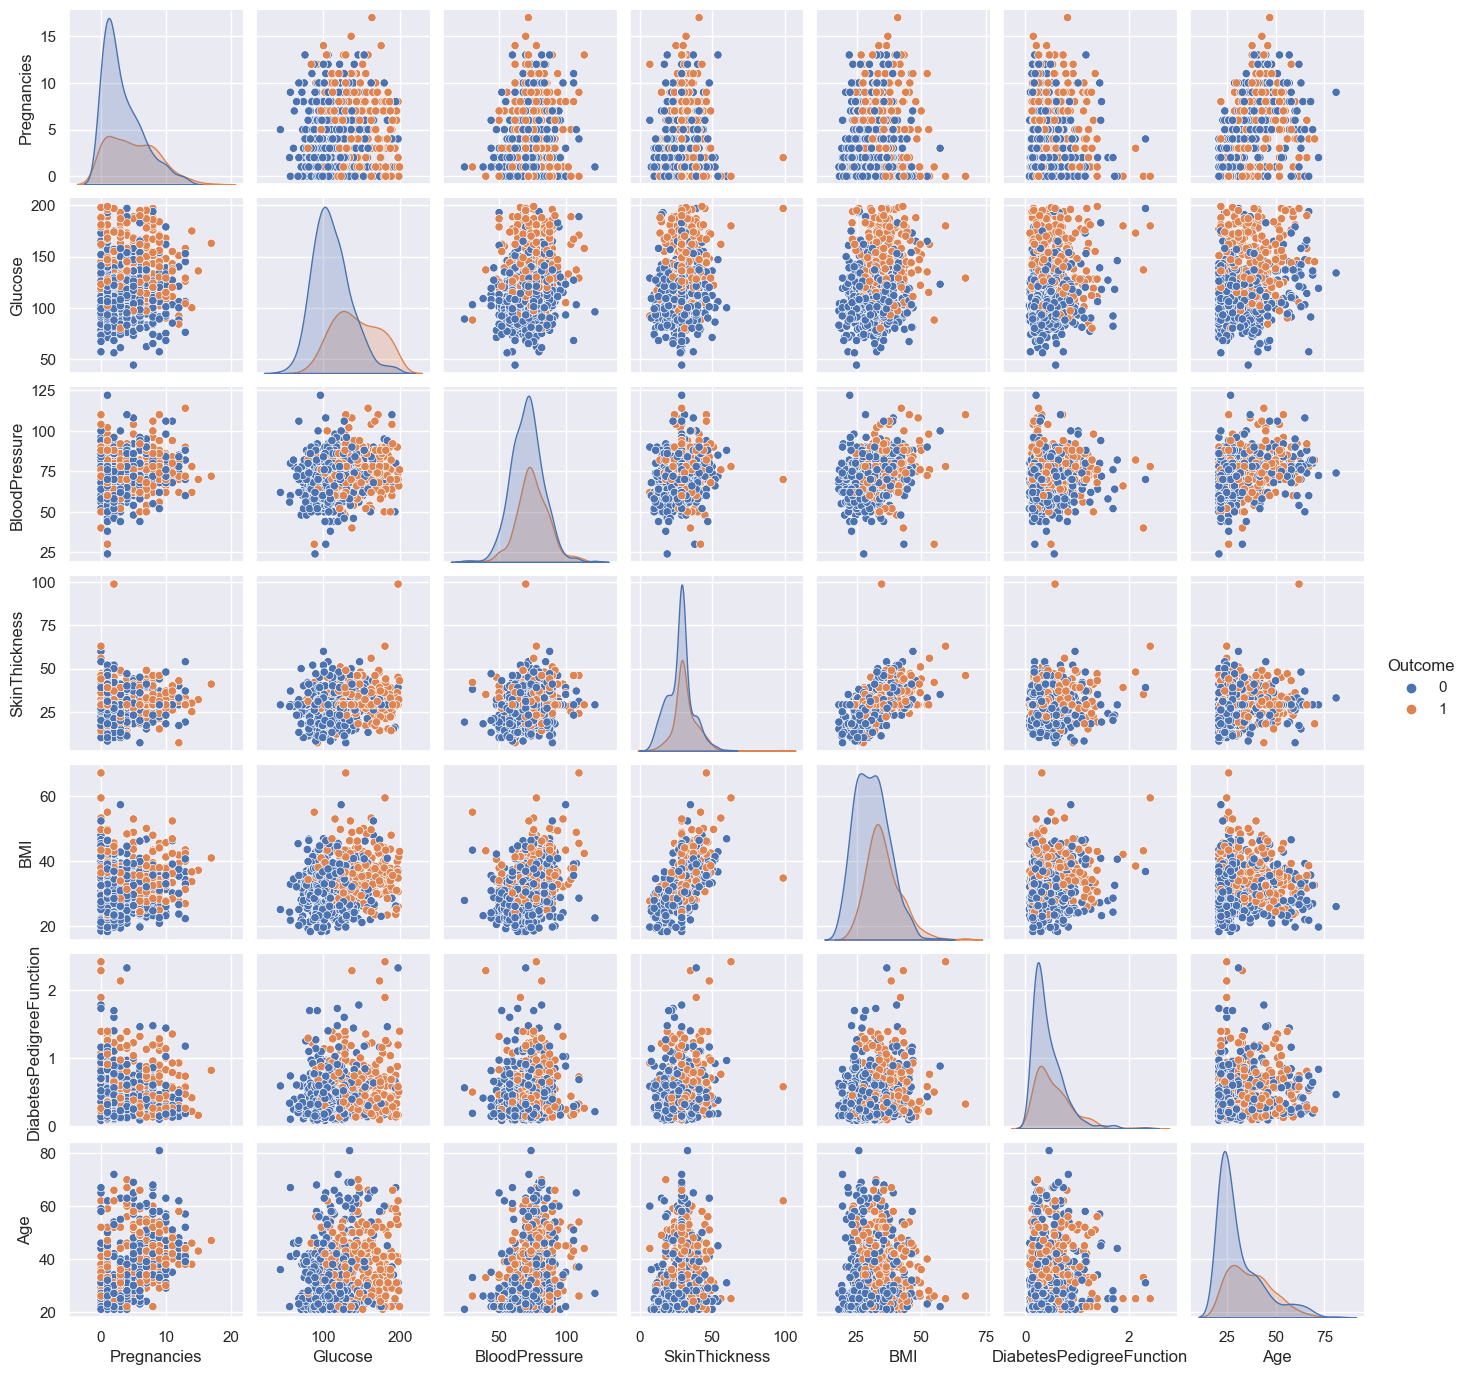

In [62]:
sns.pairplot(df_copy1, size = 2, kind ='scatter', diag_kind='kde', hue='Outcome')
plt.show()

Jika sekilas tidak ada fitur yang dapat mempengaruhi Outcome. Glukosa, BMI dan Age tampaknya jelas mempengaruhi Outcome.

selain itu fitur SkinThickness + BMI berkorelasi bisa dikatakan tinggi

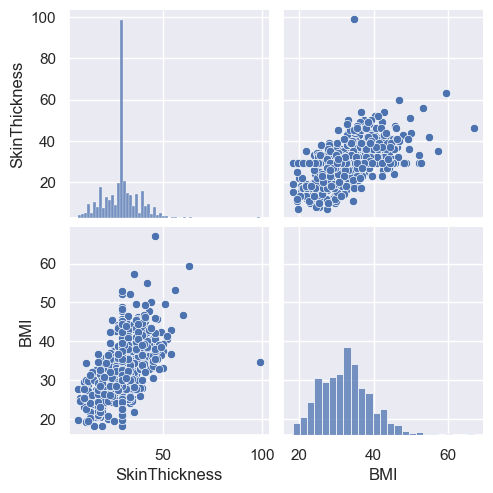

In [63]:
sns.pairplot(data = df_copy1, vars = ['SkinThickness', 'BMI'])
plt.show()

Karena SkinThickness lebih dipengaruhi oleh BMI dan outlier SkinThickness lebih banyak maka kita bisa hapus saja

In [64]:
df_copy1 = df_copy1.drop('SkinThickness', axis=1)
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 42.1 KB


In [65]:
# cek korelasi pake heatmap
def corr_plot(df2, metode):
  plt.figure(figsize=(30,15))
  triangle = np.triu(np.ones_like(df2.corr(method = metode)))
  heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, mask = triangle)
  heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12)
  return heatmap

<AxesSubplot:title={'center':'Correlation Heatmap'}>

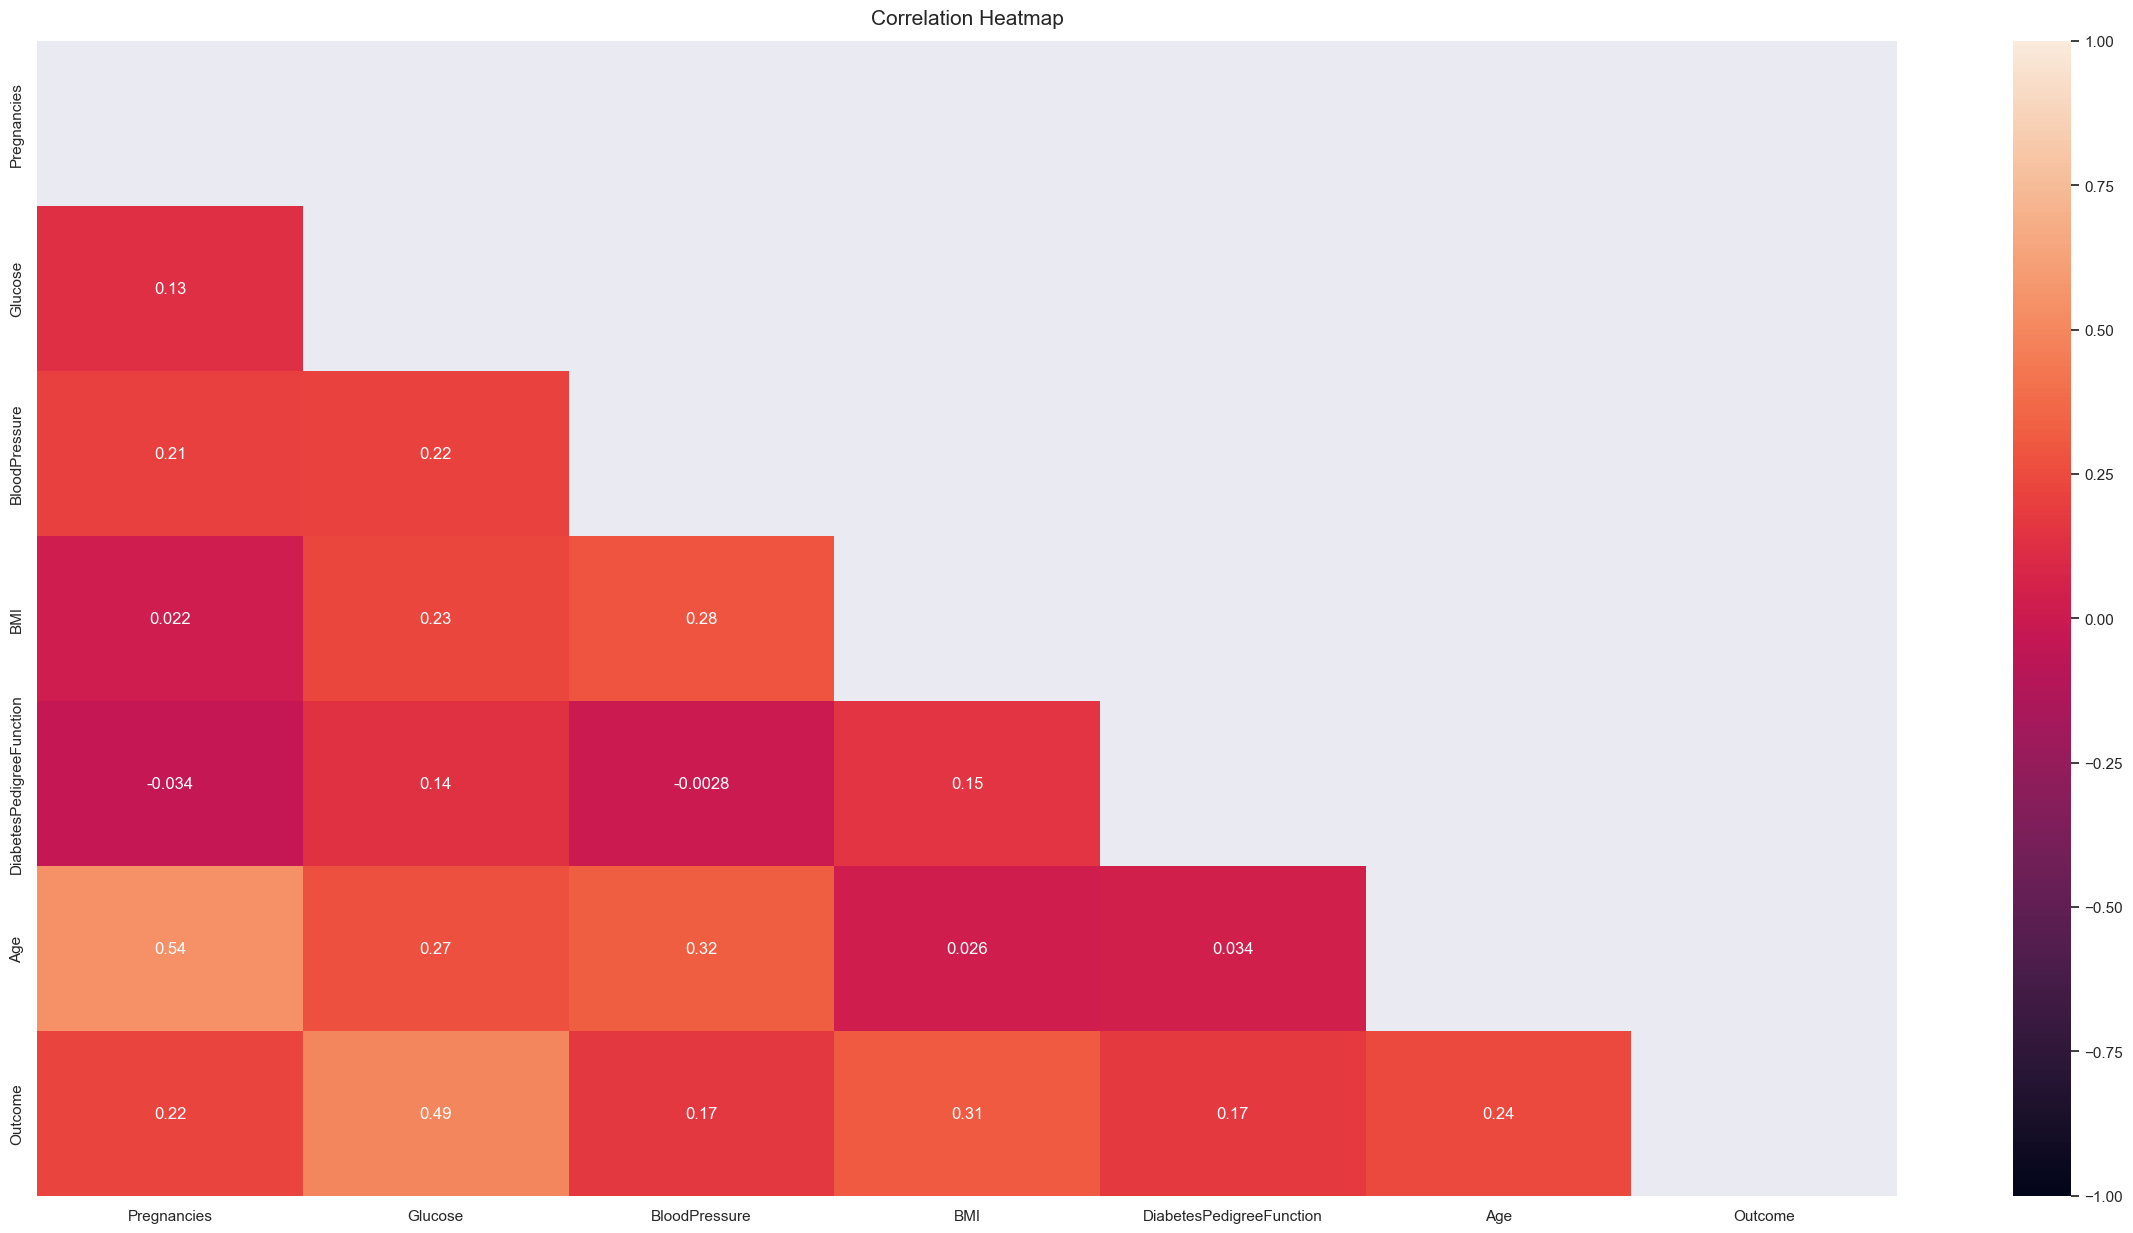

In [66]:
corr_plot(df_copy1, "spearman")

Kita ambil batas atas 0.20 dan bawah -0.2

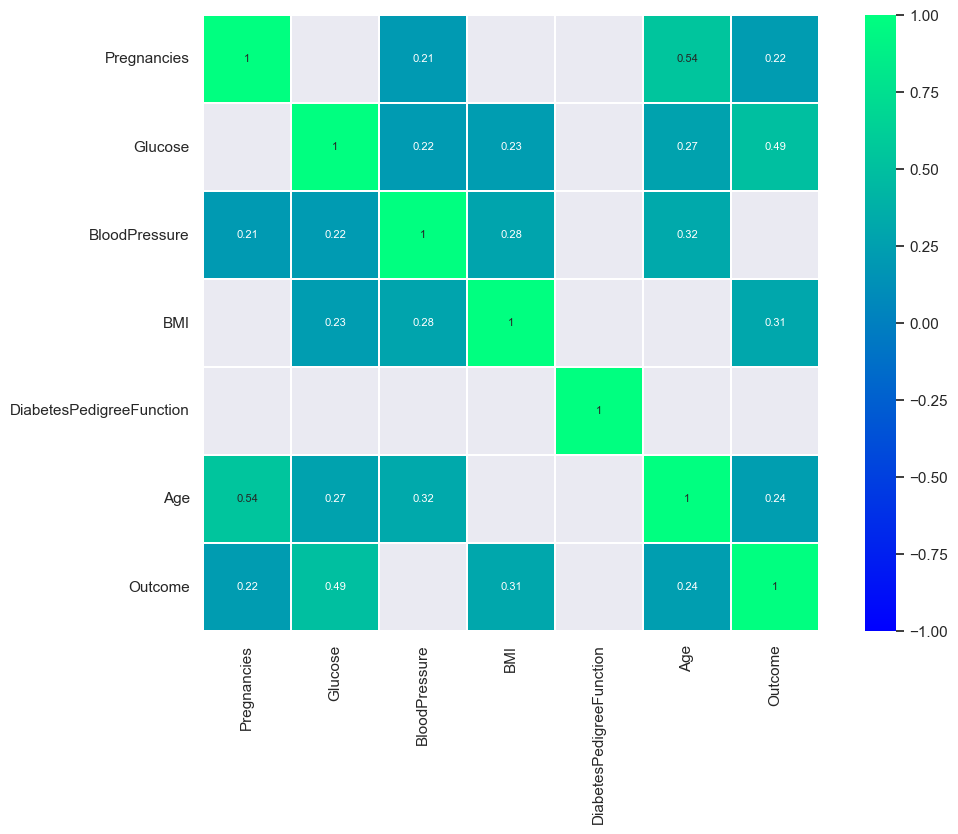

In [67]:
corr = df_copy1.corr()
paper=plt.figure(figsize=(12,8))
sns.heatmap(corr[(corr>=0.2) |(corr<= -0.2)] ,
            cmap='winter', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

plt.show()

In [68]:
hig_corr_features = corr.index[abs(corr["Outcome"]) >= 0.2]
hig_corr_features

Index(['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

Berarti yang memenuhi kriteria untuk mempunyai korelasi yang cukup dengan Outcome adalah 'Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome'

In [69]:
unique_count = df_copy1[hig_corr_features].nunique()
# Menampilkan hasil
print(unique_count)

Pregnancies     17
Glucose        136
BMI            248
Age             52
Outcome          2
dtype: int64


## Insight bisnis

<AxesSubplot:>

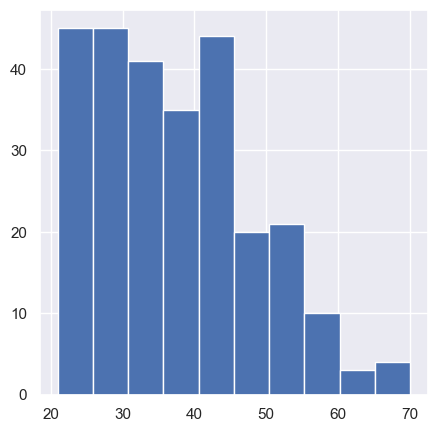

In [70]:
# Melihat persebaran 'Age' yang diabetes
age_outcome_1 = df_copy1.loc[df_copy1['Outcome'] == 1, 'Age']
age_outcome_1.hist(figsize = (5,5))

Usia pasien diabetes didominasi di sekitar 25 - 45 tahun

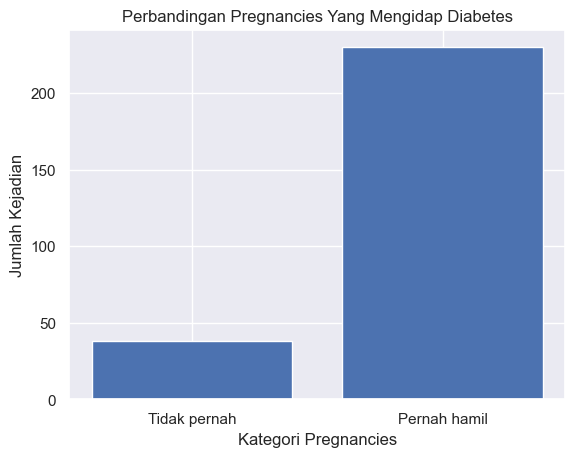

In [71]:
# Membandingkan Pregnancies dengan Outcome=1
pregnancies_outcome_1 = df_copy1[df_copy1['Outcome'] == 1]['Pregnancies']

# Menghitung jumlah kejadian di mana Pregnancies=0 dan tidak
count_pregnancies_0 = pregnancies_outcome_1[pregnancies_outcome_1 == 0].count()
count_pregnancies_not_0 = pregnancies_outcome_1[pregnancies_outcome_1 != 0].count()

# Membuat bar chart
categories = ['Tidak pernah', 'Pernah hamil']
counts = [count_pregnancies_0, count_pregnancies_not_0]

plt.bar(categories, counts)
plt.xlabel('Kategori Pregnancies')
plt.ylabel('Jumlah Kejadian')
plt.title('Perbandingan Pregnancies Yang Mengidap Diabetes')
plt.show()

Ternyata pasien didominasi oleh yang pernah hamil

In [72]:
# Fungsi untuk mengkategorikan BMI
def kategori_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesitas'

In [73]:
# Menambahkan kolom kategori BMI
df_copy1['Kategori BMI'] = df_copy1['BMI'].apply(kategori_bmi)

# Menghitung jumlah BMI dalam setiap kategori
bmi_counts = df_copy1['Kategori BMI'].value_counts().sort_values(ascending=False)

# Mencetak perbandingan
print(bmi_counts)

Obesitas       483
Overweight     179
Normal         102
Underweight      4
Name: Kategori BMI, dtype: int64


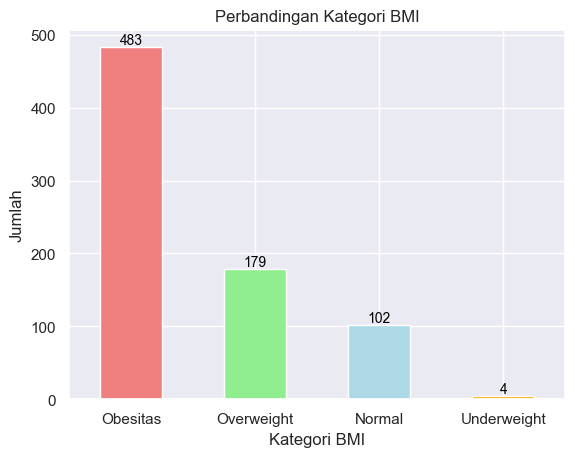

In [74]:
# Membuat bar chart dengan warna yang berbeda
colors = ['lightcoral', 'lightgreen', 'lightblue', 'orange']
ax = bmi_counts.plot(kind='bar', color=colors)

# Menambahkan label di atas setiap batang
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan label dan judul
plt.xlabel('Kategori BMI')
plt.ylabel('Jumlah')
plt.title('Perbandingan Kategori BMI')

# Mengatur x-label horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Menampilkan bar chart
plt.show()

Sampel lebih didominasi oleh obesitas

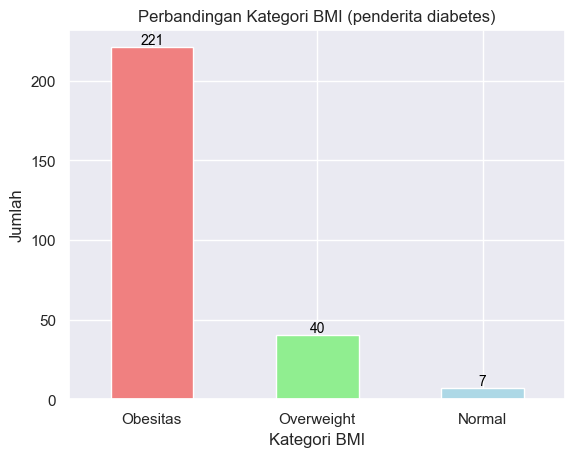

In [75]:

# Mengambil kategori BMI di mana Outcome=1
kategori_bmi_outcome_1 = df_copy1.loc[df_copy1['Outcome'] == 1, 'Kategori BMI']

# Menghitung jumlah kategori BMI
bmi_counts = kategori_bmi_outcome_1.value_counts()

# Membuat bar chart dengan warna yang berbeda
colors = ['lightcoral', 'lightgreen', 'lightblue', 'orange']
ax = bmi_counts.plot(kind='bar', color=colors)

# Menambahkan label di atas setiap batang
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan label dan judul
plt.xlabel('Kategori BMI')
plt.ylabel('Jumlah')
plt.title('Perbandingan Kategori BMI (penderita diabetes)')

# Mengatur x-label horizontal
plt.xticks(rotation=0)

# Menampilkan bar chart
plt.show()

## Bagi y dan x data

In [76]:
X = df_copy1.drop(['Outcome', 'Kategori BMI'], axis=1)
y = df_copy1.pop('Outcome')
X.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,33.6,0.627,50
1,1,85.0,66.0,26.6,0.351,31
2,8,183.0,64.0,23.3,0.672,32
3,1,89.0,66.0,28.1,0.167,21
4,0,137.0,40.0,43.1,2.288,33


In [78]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=[X.columns])
X.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,1.548980,5.484909,-0.020496


## Handle imbalanced data

In [80]:
# Smote
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y)
print('Before', counter)

# gunain smote
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X, y)

counter = Counter(y_smt)
print('After', counter)

Before Counter({0: 500, 1: 268})
After Counter({1: 500, 0: 500})


In [81]:
# Adasyn
from imblearn.over_sampling import ADASYN

counter = Counter(y)
print('Before', counter)

# gunain Adasyn
ada = ADASYN()
X_ada, y_ada = smt.fit_resample(X, y)

counter = Counter(y_ada)
print('After', counter)

Before Counter({0: 500, 1: 268})
After Counter({1: 500, 0: 500})


In [82]:
# Adasyn
from imblearn.combine import SMOTETomek

counter = Counter(y)
print('Before', counter)

# gunain Adasyn
tmk = SMOTETomek()
X_tmk, y_tmk = smt.fit_resample(X, y)

counter = Counter(y_tmk)
print('After', counter)

Before Counter({0: 500, 1: 268})
After Counter({1: 500, 0: 500})


In [83]:
# Adasyn
from imblearn.combine import SMOTEENN

counter = Counter(y)
print('Before', counter)

# gunain Adasyn
enn = SMOTEENN()
X_enn, y_enn = smt.fit_resample(X, y)

counter = Counter(y_enn)
print('After', counter)

Before Counter({0: 500, 1: 268})
After Counter({1: 500, 0: 500})


## Split data

In [84]:
from sklearn.model_selection import train_test_split
# smote
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size = 0.1, stratify=y_smt, random_state=42)
# adasyn
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X_ada, y_ada, test_size = 0.1, stratify=y_ada, random_state=42)
# tomek
X_train_tmk, X_test_tmk, y_train_tmk, y_test_tmk = train_test_split(X_tmk, y_tmk, test_size = 0.1, stratify=y_tmk, random_state=42)
# enn
X_train_enn, X_test_enn, y_train_enn, y_test_enn = train_test_split(X_enn, y_enn, test_size = 0.1, stratify=y_enn, random_state=42)

## Build models

In [109]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import LeakyReLU
from bayes_opt import BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import relu, tanh

from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

In [171]:
# Define the neural network architecture
def create_model(learning_rate, num_hidden_layers, num_neurons, dropout_rate, epochs, batch_size):
    model = Sequential()
    for i in range(num_hidden_layers):
        model.add(Dense(num_neurons, activation='tanh'))
        model.add(Dropout(dropout_rate))  # Adding dropout
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model, epochs, batch_size

In [172]:
# Define the objective function to optimize
def objective(learning_rate, num_hidden_layers, num_neurons, dropout_rate, epochs, batch_size):
    model, num_epochs, batch_size = create_model(learning_rate, int(num_hidden_layers), int(num_neurons), dropout_rate, int(epochs), int(batch_size))
    
    # Define early stopping callback
    #early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    model.fit(X_train_smt, y_train_smt, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test_smt, y_test_smt),
              verbose=0)
    
    val_loss, val_acc = model.evaluate(X_test_smt, y_test_smt, verbose=0)
    return val_acc


In [173]:
# Define the search space for hyperparameters
pbounds = {'learning_rate': (0.0001, 0.1),
           'num_hidden_layers': (1, 10),
           'num_neurons': (5, 50),
           'dropout_rate': (0.1, 0.5),
           'epochs': (5, 50),  # Define the range for epochs
           'batch_size': (16, 128)}  # Define the range for batch_size

In [174]:
# Perform Bayesian optimization
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, verbose=2)
optimizer.maximize(init_points=5, n_iter=30)

|   iter    |  target   | batch_... | dropou... |  epochs   | learni... | num_hi... | num_ne... |
-------------------------------------------------------------------------------------------------
| 1         | 0.76      | 46.51     | 0.4758    | 30.47     | 0.01949   | 6.994     | 14.43     |
| 2         | 0.8       | 57.25     | 0.4615    | 14.41     | 0.04224   | 1.561     | 5.485     |
| 3         | 0.78      | 114.1     | 0.4628    | 35.05     | 0.04076   | 4.253     | 46.82     |
| 4         | 0.73      | 86.78     | 0.2671    | 9.032     | 0.07506   | 1.527     | 41.31     |
| 5         | 0.74      | 107.2     | 0.4622    | 33.07     | 0.0688    | 5.164     | 35.79     |
| 6         | 0.69      | 16.79     | 0.3702    | 9.823     | 0.03717   | 9.079     | 25.71     |
| 7         | 0.77      | 103.0     | 0.3502    | 19.97     | 0.006351  | 3.942     | 19.54     |
| 8         | 0.67      | 90.9      | 0.2741    | 7.658     | 0.06464   | 6.63      | 44.25     |
| 9         | 0.8   

## RMSprop

In [132]:
# Print the optimized hyperparameters and validation accuracy
print('Optimized hyperparameters:')
print(optimizer.max['params'])
print('Validation accuracy: {:.2f}%'.format(optimizer.max['target'] * 100))

Optimized hyperparameters:
{'batch_size': 59.0297525277788, 'dropout_rate': 0.12953262561887147, 'epochs': 43.671498952393414, 'learning_rate': 0.01712398837842015, 'num_hidden_layers': 5.674962446753897, 'num_neurons': 11.871415035563546}
Validation accuracy: 82.00%


In [137]:
# buat model berdasarkan best parameter
best_params = optimizer.max['params']  # Mengambil parameter terbaik

# Ekstrak nilai parameter terbaik
best_learning_rate = best_params['learning_rate']
best_num_hidden_layers = int(best_params['num_hidden_layers'])
best_num_neurons = int(best_params['num_neurons'])
best_dropout_rate = best_params['dropout_rate']
best_epochs = int(best_params['epochs'])
best_batch_size = int(best_params['batch_size'])

# Membuat model dengan parameter terbaik
best_model, _, _ = create_model(best_learning_rate, best_num_hidden_layers, best_num_neurons, best_dropout_rate, best_epochs, best_batch_size)

#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Melatih model dengan data Anda
history = best_model.fit(X_train_smt, y_train_smt, epochs=best_epochs, batch_size=best_batch_size,validation_data=(X_test_smt, y_test_smt))

# Evaluasi model pada data tes
test_loss, test_acc = best_model.evaluate(X_test_smt, y_test_smt)
print("Akurasi Model Terbaik pada Data Tes:", test_acc)

Epoch 1/43
16/16 [==============================] - 2s 25ms/step - loss: 0.5487 - accuracy: 0.7222 - val_loss: 0.6005 - val_accuracy: 0.7500
Epoch 2/43
16/16 [==============================] - 0s 6ms/step - loss: 0.5123 - accuracy: 0.7656 - val_loss: 0.5074 - val_accuracy: 0.7500
Epoch 3/43
16/16 [==============================] - 0s 7ms/step - loss: 0.4831 - accuracy: 0.7744 - val_loss: 0.5055 - val_accuracy: 0.8000
Epoch 4/43
16/16 [==============================] - 0s 7ms/step - loss: 0.4713 - accuracy: 0.7822 - val_loss: 0.4860 - val_accuracy: 0.8000
Epoch 5/43
16/16 [==============================] - 0s 8ms/step - loss: 0.4823 - accuracy: 0.7833 - val_loss: 0.4879 - val_accuracy: 0.7800
Epoch 6/43
16/16 [==============================] - 0s 7ms/step - loss: 0.4663 - accuracy: 0.7878 - val_loss: 0.4857 - val_accuracy: 0.7600
Epoch 7/43
16/16 [==============================] - 0s 5ms/step - loss: 0.4611 - accuracy: 0.7822 - val_loss: 0.4750 - val_accuracy: 0.7800
Epoch 8/43
16/16 [=

In [138]:
# Simpan history ke dalam file CSV
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.548658,0.722222,0.600494,0.75,0
1,0.512348,0.765556,0.507404,0.75,1
2,0.483149,0.774444,0.505515,0.80,2
3,0.471328,0.782222,0.486026,0.80,3
4,0.482278,0.783333,0.487908,0.78,4


In [139]:
y_run = hist[['loss', 'val_loss']]
x_run = hist['epoch']

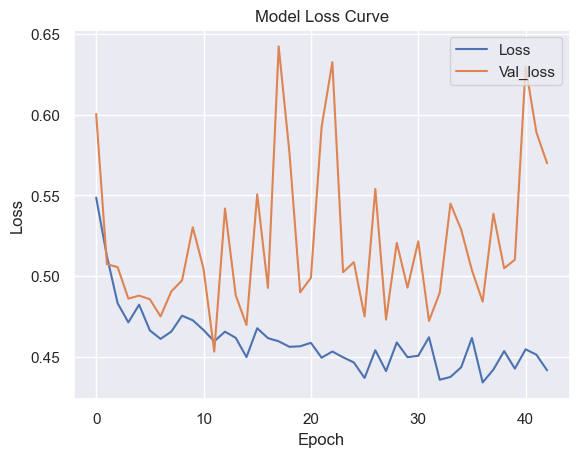

In [140]:
plt.plot(x_run,y_run)
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss', 'Val_loss'], loc='upper right')
plt.show()

## SGD

In [118]:
# Print the optimized hyperparameters and validation accuracy
print('Optimized hyperparameters:')
print(optimizer.max['params'])
print('Validation accuracy: {:.2f}%'.format(optimizer.max['target'] * 100))

Optimized hyperparameters:
{'batch_size': 38.97052822994731, 'dropout_rate': 0.1, 'epochs': 27.761805473945866, 'learning_rate': 0.1, 'num_hidden_layers': 1.5592470717655778, 'num_neurons': 38.59508898519163}
Validation accuracy: 81.00%


In [124]:
# buat model berdasarkan best parameter
best_params = optimizer.max['params']  # Mengambil parameter terbaik

# Ekstrak nilai parameter terbaik
best_learning_rate = best_params['learning_rate']
best_num_hidden_layers = int(best_params['num_hidden_layers'])
best_num_neurons = int(best_params['num_neurons'])
best_dropout_rate = best_params['dropout_rate']
best_epochs = int(best_params['epochs'])
best_batch_size = int(best_params['batch_size'])

# Membuat model dengan parameter terbaik
best_model, _, _ = create_model(best_learning_rate, best_num_hidden_layers, best_num_neurons, best_dropout_rate, best_epochs, best_batch_size)

#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Melatih model dengan data Anda
history = best_model.fit(X_train_smt, y_train_smt, epochs=best_epochs, batch_size=best_batch_size, validation_data=(X_test_smt, y_test_smt))

# Evaluasi model pada data tes
test_loss, test_acc = best_model.evaluate(X_test_smt, y_test_smt)
print("Akurasi Model Terbaik pada Data Tes:", test_acc)

Epoch 1/27
24/24 [==============================] - 1s 13ms/step - loss: 0.6035 - accuracy: 0.6911 - val_loss: 0.5124 - val_accuracy: 0.7800
Epoch 2/27
24/24 [==============================] - 0s 5ms/step - loss: 0.5019 - accuracy: 0.7622 - val_loss: 0.4870 - val_accuracy: 0.7700
Epoch 3/27
24/24 [==============================] - 0s 6ms/step - loss: 0.4813 - accuracy: 0.7622 - val_loss: 0.4845 - val_accuracy: 0.7700
Epoch 4/27
24/24 [==============================] - 0s 5ms/step - loss: 0.4746 - accuracy: 0.7778 - val_loss: 0.4871 - val_accuracy: 0.7800
Epoch 5/27
24/24 [==============================] - 0s 5ms/step - loss: 0.4696 - accuracy: 0.7678 - val_loss: 0.4875 - val_accuracy: 0.7800
Epoch 6/27
4/4 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.7700
Akurasi Model Terbaik pada Data Tes: 0.7699999809265137


In [125]:
# Simpan history ke dalam file CSV
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.603461,0.691111,0.512417,0.78,0
1,0.501910,0.762222,0.487046,0.77,1
2,0.481267,0.762222,0.484549,0.77,2
3,0.474563,0.777778,0.487070,0.78,3
4,0.469595,0.767778,0.487519,0.78,4


In [126]:
y_run = hist[['loss', 'val_loss']]
x_run = hist['epoch']

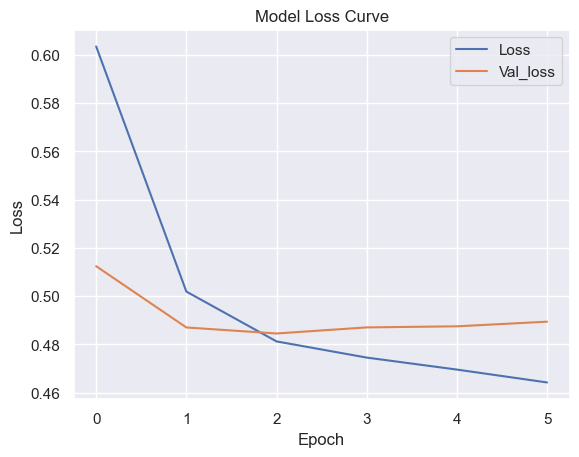

In [127]:
plt.plot(x_run,y_run)
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss', 'Val_loss'], loc='upper right')
plt.show()

## Adam

In [175]:
# Print the optimized hyperparameters and validation accuracy
print('Optimized hyperparameters:')
print(optimizer.max['params'])
print('Validation accuracy: {:.2f}%'.format(optimizer.max['target'] * 100))

Optimized hyperparameters:
{'batch_size': 118.56600377380107, 'dropout_rate': 0.17031213397979403, 'epochs': 36.51986613630033, 'learning_rate': 0.055556067947313936, 'num_hidden_layers': 1.4494575296845922, 'num_neurons': 47.13726675734228}
Validation accuracy: 82.00%


In [176]:
# buat model berdasarkan best parameter
best_params = optimizer.max['params']  # Mengambil parameter terbaik

# Ekstrak nilai parameter terbaik
best_learning_rate = best_params['learning_rate']
best_num_hidden_layers = int(best_params['num_hidden_layers'])
best_num_neurons = int(best_params['num_neurons'])
best_dropout_rate = best_params['dropout_rate']
best_epochs = int(best_params['epochs'])
best_batch_size = int(best_params['batch_size'])

# Membuat model dengan parameter terbaik
best_model, _, _ = create_model(best_learning_rate, best_num_hidden_layers, best_num_neurons, best_dropout_rate, best_epochs, best_batch_size)

#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Melatih model dengan data Anda
history = best_model.fit(X_train_smt, y_train_smt, epochs=best_epochs, batch_size=best_batch_size, validation_data=(X_test_smt, y_test_smt))
# Evaluasi model pada data tes
test_loss, test_acc = best_model.evaluate(X_test_smt, y_test_smt)
print("Akurasi Model Terbaik pada Data Tes:", test_acc)


Epoch 1/36
8/8 [==============================] - 1s 33ms/step - loss: 0.5749 - accuracy: 0.6967 - val_loss: 0.5321 - val_accuracy: 0.7500
Epoch 2/36
8/8 [==============================] - 0s 9ms/step - loss: 0.4931 - accuracy: 0.7578 - val_loss: 0.4914 - val_accuracy: 0.7300
Epoch 3/36
8/8 [==============================] - 0s 8ms/step - loss: 0.4841 - accuracy: 0.7522 - val_loss: 0.4939 - val_accuracy: 0.7700
Epoch 4/36
8/8 [==============================] - 0s 8ms/step - loss: 0.4777 - accuracy: 0.7656 - val_loss: 0.5014 - val_accuracy: 0.7900
Epoch 5/36
8/8 [==============================] - 0s 8ms/step - loss: 0.4644 - accuracy: 0.7778 - val_loss: 0.4976 - val_accuracy: 0.7300
Epoch 6/36
8/8 [==============================] - 0s 8ms/step - loss: 0.4502 - accuracy: 0.7744 - val_loss: 0.4881 - val_accuracy: 0.8000
Epoch 7/36
8/8 [==============================] - 0s 8ms/step - loss: 0.4654 - accuracy: 0.7800 - val_loss: 0.4814 - val_accuracy: 0.8100
Epoch 8/36
8/8 [=================

In [177]:
# Simpan history
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.574851,0.696667,0.532064,0.75,0
1,0.493110,0.757778,0.491386,0.73,1
2,0.484061,0.752222,0.493899,0.77,2
3,0.477665,0.765556,0.501388,0.79,3
4,0.464429,0.777778,0.497576,0.73,4


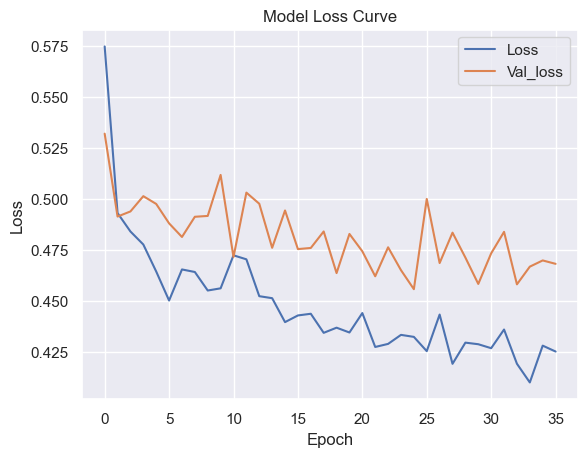

In [178]:
y_run = hist[['loss', 'val_loss']]
x_run = hist['epoch']
plt.plot(x_run,y_run)
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss', 'Val_loss'], loc='upper right')
plt.show()

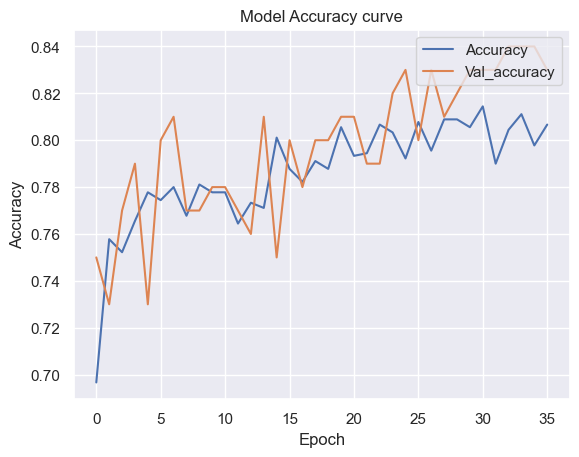

In [180]:
y_acc = hist[['accuracy', 'val_accuracy']]
x_epoch = hist['epoch']
plt.plot(x_epoch,y_acc)
plt.title('Model Accuracy curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_accuracy'], loc='upper right')
plt.show()